In [10]:
import pandas as pd
import numpy as np
import pylab as pl

In [2]:
# Missing values tutorials https://www.kaggle.com/rtatman/data-cleaning-challenge-handling-missing-values

In [20]:
# Analyse the number of missing values
raw_data = pd.read_csv('~/Machine Learning staff/Junction/Datasets/data3/datatraining.txt')
test1 = pd.read_csv('~/Machine Learning staff/Junction/Datasets/data3/datatest.txt')
test2 = pd.read_csv('~/Machine Learning staff/Junction/Datasets/data3/datatest2.txt')
np.random.seed(0)

In [21]:
data = raw_data.drop_duplicates(subset='date')
data = data.dropna()
data = data.sort_values(by='date')
data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [22]:
test1.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0bccd8a6d8>,
      dtype=object)

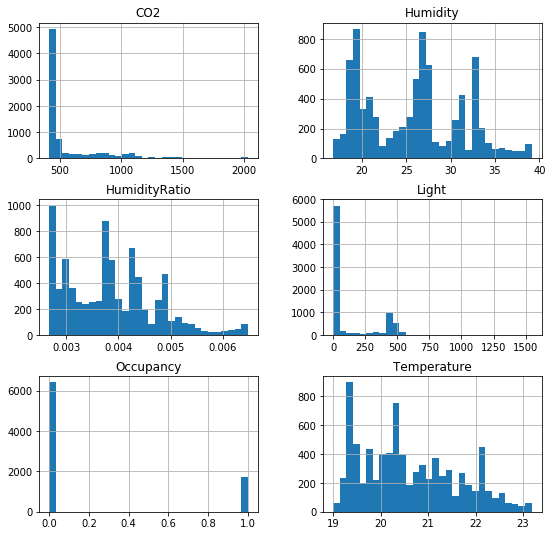

In [17]:
data.hist(bins=30, figsize=(9,9))

In [38]:
X_train = data.iloc[:,1:6]
X_test1 = test1.iloc[:,1:6]
y_train = data.iloc[:,6]
y_test1 = test1.iloc[:,6]
y_test1.head()

140    1
141    1
142    1
143    1
144    1
Name: Occupancy, dtype: int64

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test1)
X_train

array([[1.        , 0.47053302, 0.27549041, 0.190933  , 0.55731842],
       [0.99282297, 0.47033188, 0.27775383, 0.18644592, 0.55480723],
       [0.99282297, 0.46932618, 0.27549041, 0.18613647, 0.55376106],
       ...,
       [0.50239234, 0.86490111, 0.28001725, 0.23874362, 0.76843752],
       [0.50239234, 0.87227623, 0.28001725, 0.25225643, 0.77522635],
       [0.50239234, 0.86959437, 0.28907092, 0.25266904, 0.77275762]])

In [39]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test1, y_test1)))

Accuracy of Logistic regression classifier on training set: 0.99
Accuracy of Logistic regression classifier on test set: 0.98
